In [16]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

def evol(output="sample_iot_result_n5.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=50)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    # print(logbook)
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
            
evol()

multi
String: 111100111010101101111000101011001110011001010010100001111100011011010111011000101011011001011011010011000001101100011010111111010010111010001110111110110000011111000010000001111010
 -> accuracy = 0.925, gates = 20.0,recall =1.0
String: 001010000100101001000110101111001110000100111111010101010101101110001101101001111111011100101000000111101011100110110111101100010000100100010001000001001101010000010001010011011110
 -> accuracy = 0.95, gates = 40.0,recall =1.0
String: 100100011111011110000111011011011111000000110111001011111100001010000110110100100110011111010101001001101100000010001101111010011011011011110010101100100110010111001000010010010001
 -> accuracy = 0.975, gates = 36.0,recall =1.0
String: 111101101011011011101101001010001100101101110101001111000000001010110100100011001110000000110000000100111101001000000111011110000000010011000011001010110101100000101111000011111001
 -> accuracy = 0.9, gates = 32.0,recall =1.0
String: 101011100101110011010101110010000000000001111

d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 100000100001111010010101110100110000000010111111001000000011001011011010100000001010000110101011101111011001010111111111101100100001011101101001100011111110000001001001001111011001
 -> accuracy = 0.925, gates = 22.0,recall =1.0
String: 111100100000111010100001100111000001000110011001011110001101000111011010010011101100011001010101100100000111011001110011001101001011111110011111010111100111101001101010000011101000
 -> accuracy = 0.95, gates = 29.0,recall =1.0
String: 001010000010100101101100011000101011101000111100111101011110000001100100000001110111110000101101101010101111111110111011111100101101100010111010100000100101111001111110100010011111
 -> accuracy = 0.825, gates = 24.0,recall =1.0
String: 100101101100101100010101000101111010011110000001010001100111101111010010110111111111110100101100101111000001100101111101000010100010010001000001001111001000001000100100100101010101
 -> accuracy = 0.8, gates = 32.0,recall =1.0
String: 100100111000110000011001101010111110110011010001010

In [15]:
import encoding2 as e2
import random

iot_result = pd.read_csv('sample_iot_result_n5.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,2,0101110100110011001110011010101111011010010000...,4.333333,1.000
1,1,0101110100110011001110011010100100110111101110...,2.600833,0.975
2,0,0101110100110000000101011010101011111010101110...,2.520938,0.825


['00110', '01001', '10101', '10100', '11001', '11100', '10010', '11001', '11000', '10001', '11001', '00000', '11001', '01011', '11001', '11110', '11010', '01100', '11011', '10111', '11001', '00010', '00010', '10100', '10100', '01001', '00000', '10011', '01000', '01010', '00001', '11011', '01001', '10111', '01101', '10101']
14.0


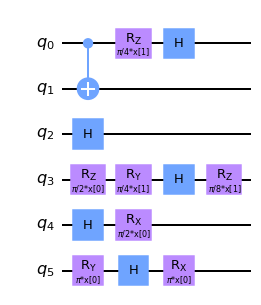

In [13]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
# from qiskit.aqua import QuantumInstance
def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')